In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyreadstat
file_path = 'C:/Users/Candela/Desktop/TP2MET/BASEDATOS_ARGENTINA_122_ .sav'

df_diputados, meta = pyreadstat.read_sav('C:/Users/Candela/Desktop/TP2MET/BASEDATOS_ARGENTINA_122_ .sav')

df_diputados = df_diputados.loc[~((df_diputados['ID101'] == 98) | (df_diputados['ID101'] == 99) | 
                                   (df_diputados['PRO102'] == 98) | (df_diputados['PRO112'] == 99))]

In [4]:
df_diputados.head (266)

,Encuestado,País,legis,partido,departa,tipoelec,comision01,comision02,comision03,comision04,...,pcontacto2,pcontacto3,resultado1,resultado107,causaneg1,resultado2,causaneg2,resultado3,causaneg3,peso
0,4.0,1.0,2022.0,20.0,12.0,2.0,7.0,16.0,31.0,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.040102
1,6.0,1.0,2022.0,7.0,2.0,2.0,2.0,3.0,15.0,25.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
2,10.0,1.0,2022.0,2.0,15.0,2.0,1.0,2.0,3.0,4.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.838407
3,11.0,1.0,2022.0,7.0,2.0,2.0,5.0,15.0,27.0,35.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
4,12.0,1.0,2022.0,29.0,9.0,2.0,37.0,38.0,NaN,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.096378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,252.0,1.0,2022.0,20.0,2.0,2.0,18.0,19.0,NaN,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.040102
107,256.0,1.0,2022.0,7.0,2.0,2.0,26.0,29.0,36.0,43.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
108,257.0,1.0,2022.0,2.0,6.0,2.0,1.0,6.0,7.0,33.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.838407
109,258.0,1.0,2022.0,7.0,2.0,2.0,3.0,4.0,18.0,33.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927


In [5]:
pd.set_option('display.max_columns', None)
print(df_diputados)

     Encuestado  País   legis  partido  departa  tipoelec  comision01  \
0           4.0   1.0  2022.0     20.0     12.0       2.0         7.0   
1           6.0   1.0  2022.0      7.0      2.0       2.0         2.0   
2          10.0   1.0  2022.0      2.0     15.0       2.0         1.0   
3          11.0   1.0  2022.0      7.0      2.0       2.0         5.0   
4          12.0   1.0  2022.0     29.0      9.0       2.0        37.0   
..          ...   ...     ...      ...      ...       ...         ...   
106       252.0   1.0  2022.0     20.0      2.0       2.0        18.0   
107       256.0   1.0  2022.0      7.0      2.0       2.0        26.0   
108       257.0   1.0  2022.0      2.0      6.0       2.0         1.0   
109       258.0   1.0  2022.0      7.0      2.0       2.0         3.0   
110       259.0   1.0  2022.0     20.0     12.0       2.0         4.0   

     comision02  comision03  comision04  comision05  comision06  comision07  \
0          16.0        31.0         NaN     

In [6]:
df_diputados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 110
Columns: 266 entries, Encuestado to peso
dtypes: float64(261), object(5)
memory usage: 229.5+ KB


In [7]:
df_diputados.describe()

,Encuestado,País,legis,partido,departa,tipoelec,comision01,comision02,comision03,comision04,comision05,comision06,comision07,comision08,comision09,DEM1,PRO101,PRO102,PRO103,PRO104,PRO105,PRO106,PRO107,PRO108,PRO109,PRO110,PRO111,PRO112,PRO113,PRO114,DEM5,DEM6,INST101,INST102,INST103,INST104,INST105,INST106,INST107,INST108,INST109,INST110,INST111,INST112,INST113,INST114,INST115,ELE1,ELE201,IDP101,IDP102,IDP103,IDP104,IDP105,IDLN101,IDLN102,IDLN103,IDLN104,IDLN105,IDLN106,PP101,PP102,PP103,PP104,PP105,PP106,PP107,PP1a01,PP1a02,DIS1,DIS2,DIS3,REP1,REP2,CAMP401,CAMP402,CAMP403,CAMP404,CAND101,MED101,MED102,MED103,MED104,CLIEN2a01,CLIEN2a02,CLIEN2a03,CLIEN2a04,CLIEN2a05,CLIEN4,ACT101,ACT102,ACT103,ACT104,ACT105,VINC101,VINC102,VINC103,VINC104,VINC105,VINC106,VINC107,PJ101,FFAA101,EM101,INM101,INM102,INM103,INM104,INM105,INM106,GEN101,GEN102,GEN103,GEN104,GEN105,GEN201,GEN202,GEN203,GEN204,GEN401,GEN402,GEN403,GEN404,GEN405,CO201,CO202,CO203,CO204,CO205,CO206,CO207,CO208,CO209,CO210,CO211,CO212,CO213,CO3,ROES101,ROES102,ROES103,ROES104,ROES105,PRO2,ROES1A01,ROES1A02,ROES1A03,ROES1A04,BID401,BID501,BID502,CLIMA201,TR101,TR102,TR2,MPOL101,MPOL201,MPOL102,MPOL202,MPOL103,MPOL203,TR3,TR3a101,TR3a102,TR3a201,TR3a202,TR3a301,TR3a302,POL1,TR501,TR502,TR503,TR5a101,TR5a102,TR5a103,TR5a201,TR5a202,TR5a203,TR5a0301,TR5a0302,TR5a0303,EXPP1,EXPP1a,EXPP1b,AGL1,REP301,REP302,REP401,REP402,REP601,REP602,REP603,REP5,LEG3,SOCP1,SOCP2,SOCP2a01,SOCP2a02,SOCP2a03,SOCP2b01,SOCP2b02,SOCP2b03,SOCP2c01,SOCP2c02,SOCP2c03,SOCD1,SOCD2,SOCD3,SOCD3a,CONF101,BID1,BID301,BID201,BID202,VAL101,VAL102,VAL103,VAL104,VAL105,ID101,ID201,RE1,RE1a,RE1b,SOCD4,SOCD5,SOCD6,SOCD10,SOCD10a,SOCD10b,SOCD7,SOCD8,RED101,RED102,RED103,RED104,SOCD9,SOCD9a,ING1,ING3,V1,V201,V3,Duración,entrev,hora1,v2,v4,contacto1,contacto2,contacto3,pcontacto1,pcontacto2,pcontacto3,resultado1,causaneg1,resultado2,causaneg2,resultado3,causaneg3,peso
count,110.000000,110.0,110.0,110.000000,110.000000,110.0,110.000000,110.000000,103.000000,89.000000,68.000000,30.000000,15.000000,5.000000,2.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,21.000000,21.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,30.000000,27.000000,8.000000,8.000000,110.000000,40.000000,40.000000,14.000000,14.000000,6.000000,6.000000,110.000000,110.000000,110.000000,110.000000,49.000000,10.000000,1.0,72.000000,31.000000,4.00,78.000000,26.000000,9.000000,110.000000,102.000000,4.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,11

In [8]:
print(df_diputados[["DEM1","PRO108"]])

     DEM1  PRO108
0     4.0     8.0
1     2.0     7.0
2     4.0     7.0
3     4.0     6.0
4     1.0     6.0
..    ...     ...
106   4.0    10.0
107   3.0    10.0
108   4.0    10.0
109   3.0     8.0
110   4.0     9.0

[110 rows x 2 columns]


In [9]:
valores_DEM1 = df_diputados ['DEM1'].unique() 
valores_PRO108 = df_diputados ['PRO108'].unique()

print("Valores únicos en DEM1:", valores_DEM1) 
print("Valores únicos en PRO108:", valores_PRO108)

Valores únicos en DEM1: [4. 2. 1. 3.]
Valores únicos en PRO108: [ 8.  7.  6.  5. 10.  9.  4.  3.]


In [10]:
#"¿la democracia en Argentina es hoy: muy estable, algo estable, poco estable o nada estable?"
x = df_diputados["DEM1"]

print(x.head())

0    4.0
1    2.0
2    4.0
3    4.0
4    1.0
Name: DEM1, dtype: float64


In [11]:
#"En una escala de 1 a 10, donde 1 significa "no es una cuestión importante" y el 10 "es una cuestión muy importante"? valore el conflicto entre los poderes del Estado"
y = df_diputados["PRO108"]

print(y.head())

0    8.0
1    7.0
2    7.0
3    6.0
4    6.0
Name: PRO108, dtype: float64


Text(0, 0.5, 'Conflicto entre poderes')

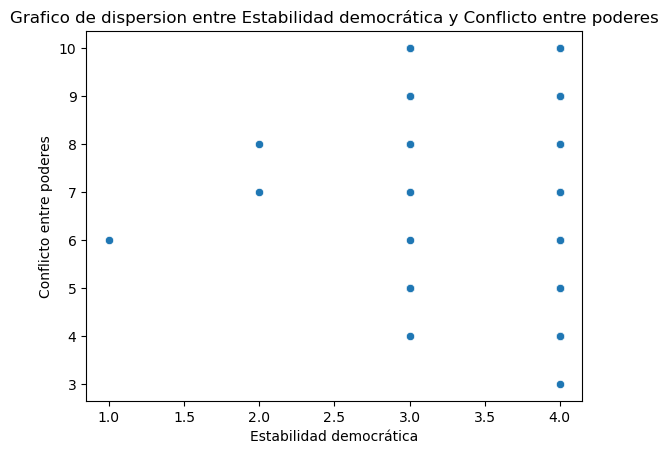

In [36]:
sns.scatterplot(x='DEM1', y='PRO108', data=df_diputados)

plt.title('Grafico de dispersion entre Estabilidad democrática y Conflicto entre poderes')
plt.xlabel('Estabilidad democrática')
plt.ylabel('Conflicto entre poderes')

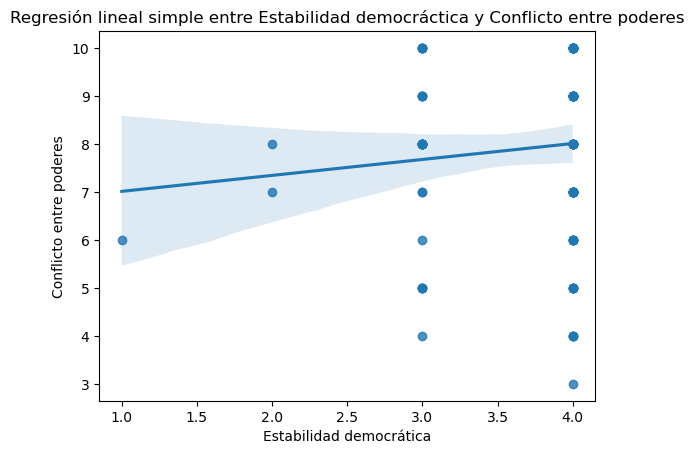

In [13]:
sns.regplot(x=df_diputados["DEM1"], y=df_diputados["PRO108"], data=df_diputados)

plt.title('Regresión lineal simple entre Estabilidad democráctica y Conflicto entre poderes')
plt.xlabel('Estabilidad democrática')
plt.ylabel('Conflicto entre poderes')
plt.show()

In [14]:
x = df_diputados["DEM1"]
y = df_diputados["PRO108"]

correlacion_pearson = np.corrcoef(x, y)[0, 1]

print("La correlación de Pearson entre Estabilidad democrática y Conflicto entre poderes es:", correlacion_pearson)

La correlación de Pearson entre Estabilidad democrática y Conflicto entre poderes es: 0.10006407354976563


In [15]:
X = df_diputados[['DEM1']]  
y = df_diputados['PRO108'] 
model = sm.OLS(y, X).fit()

r_squared = model.rsquared
print("El coeficiente de determinación (R²) es:", r_squared)

El coeficiente de determinación (R²) es: 0.9355523524260299


In [16]:
covarianza = df_diputados[['DEM1', 'PRO108']].cov()

print("La matriz de covarianza es:")
print(covarianza)

La matriz de covarianza es:
            DEM1    PRO108
DEM1    0.303670  0.100917
PRO108  0.100917  3.349458


In [17]:
X = df_diputados[['DEM1']]
y = df_diputados['PRO108']

x = sm.add_constant(x)

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 PRO108   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1582.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                    9.96e-67
Time:                        01:48:44   Log-Likelihood:                         -235.60
No. Observations:                 110   AIC:                                      473.2
Df Residuals:                     109   BIC:                                      475.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
#¿CUAL ES EL VALOR DE LA PENDIENTE? COMO HACER QUE APAREZCA EN EL GRAFICO? QUE MÁS HAY QUE CALCULAR APARTE DE
#COVARIANZA
#R2
#PEARSON
#SIGNIFICATIVIDAD (NO LO HICE)
#ERROR (NO LO HICE CREO)